- This notebook plots post Born bispectra generated with Bispectrum Code to compare against CMB lensing results from P&L paper
- specifically it was used to check new implementation of general formula for cross bispectra (shared with Will Coulton, Nov 2018)

In [14]:

import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.style.use(['seaborn-colorblind','paper'])
plt.style.use('classic')

In [15]:
path_bispec = '/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/outputs/bispectra/'
path_ell    = '/home/nessa/Documents/Projects/LensingBispectrum/CMB-nonlinear/outputs/ells/'

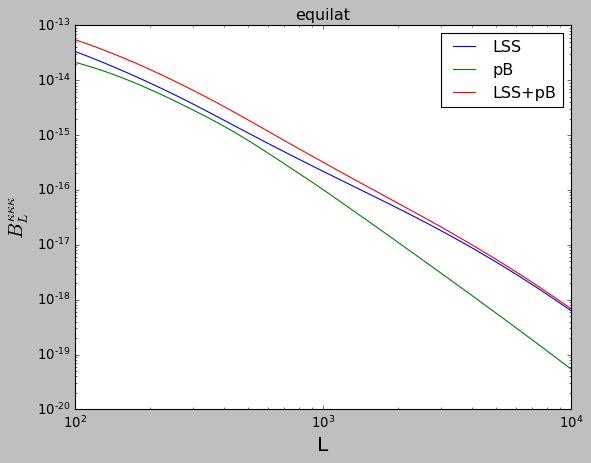

In [31]:
# equilat, CMB lensing

L,l,theta=pickle.load(open(path_ell+'ell_ang_equilat_Lmin100_Lmax10000_lmin100_lmax8000_lenL160_lenl180_lenang160_1e-04.pkl','r'))

bispec_nl = np.load(path_bispec+'bispec_kkk_pBtest_equilat_Planck2015_Lmin100-Lmax10000-lmax10000_halofit_GM.npy')
bispec_pB = np.load(path_bispec+'bispec_kkk_pBtest_equilat_Planck2015_Lmin100-Lmax10000-lmax10000_halofit_GM_post_born.npy')
bispec_sum = np.load(path_bispec+'bispec_kkk_pBtest_equilat_Planck2015_Lmin100-Lmax10000-lmax10000_halofit_GM_post_born_sum.npy')

plt.figure()
plt.title('equilat')
plt.loglog(L,bispec_nl,label='LSS')
plt.loglog(L,bispec_pB,label='pB')
plt.loglog(L,bispec_sum,label='LSS+pB')
plt.ylabel('$B^{\kappa\kappa\kappa}_L$',fontsize=18)
plt.xlabel('L',fontsize=18)
plt.xlim(100,10000)
plt.ylim(1e-20,1e-13)
plt.legend()
plt.show()

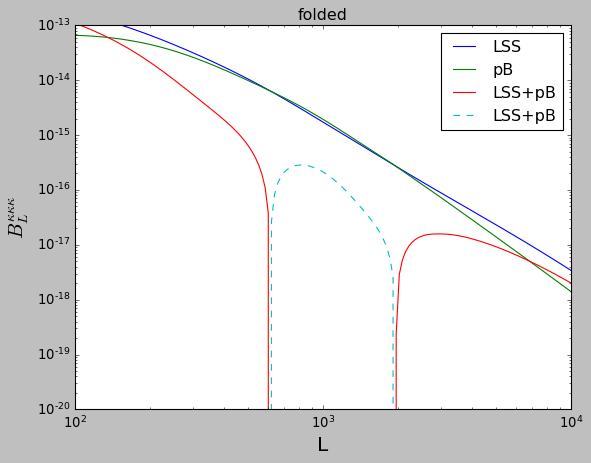

In [70]:
# folded, CMB lensing

L,l,theta=pickle.load(open(path_ell+'ell_ang_folded_Lmin100_Lmax10000_lmin100_lmax8000_lenL160_lenl180_lenang160_1e-04.pkl','r'))

bispec_nl = np.load(path_bispec+'bispec_kkk_pBtest_folded_Planck2015_Lmin100-Lmax10000-lmax5000_halofit_GM.npy')
bispec_pB = np.load(path_bispec+'bispec_kkk_pBtest_folded_Planck2015_Lmin100-Lmax10000-lmax5000_halofit_GM_post_born.npy')
bispec_sum = np.load(path_bispec+'bispec_kkk_pBtest_folded_Planck2015_Lmin100-Lmax10000-lmax5000_halofit_GM_post_born_sum.npy')



plt.figure()
plt.title('folded')
plt.loglog(L,bispec_nl,label='LSS')
plt.loglog(L,-bispec_pB,label='pB')
plt.loglog(L,bispec_sum,label='LSS+pB')
plt.loglog(L,-bispec_sum,label='LSS+pB',ls='--')
plt.ylabel('$B^{\kappa\kappa\kappa}_L$',fontsize=18)
plt.xlabel('L',fontsize=18)
plt.legend()
plt.xlim(100,10000)
plt.ylim(1e-20,1e-13)
plt.show()

In [71]:
bi_post,bi_post_true= pickle.load(open(path_bispec+'bispec_kkk_pBtest_folded_Planck2015_Lmin100-Lmax10000-lmax5000_halofit_GM'+"pB_test.pkl",'r'))
print(bi_post_true)

(array([ -9.85890639e-14,  -9.74134996e-14,  -9.61668098e-14,
        -9.48510611e-14,  -9.34685251e-14,  -9.20216770e-14,
        -9.05131884e-14,  -8.89459202e-14,  -8.73229137e-14,
        -8.56473789e-14,  -8.39226822e-14,  -8.21523351e-14,
        -8.03399820e-14,  -7.84893861e-14,  -7.66044143e-14,
        -7.46890205e-14,  -7.27472293e-14,  -7.07831188e-14,
        -6.88008043e-14,  -6.68044192e-14,  -6.47980977e-14,
        -6.27859566e-14,  -6.07720758e-14,  -5.87604814e-14,
        -5.67551272e-14,  -5.47598783e-14,  -5.27784947e-14,
        -5.08146148e-14,  -4.88717400e-14,  -4.69532203e-14,
        -4.50622418e-14,  -4.32018145e-14,  -4.13747611e-14,
        -3.95837070e-14,  -3.78310718e-14,  -3.61190625e-14,
        -3.44496679e-14,  -3.28246551e-14,  -3.12455665e-14,
        -2.97137195e-14,  -2.82302056e-14,  -2.67958933e-14,
        -2.54114303e-14,  -2.40772488e-14,  -2.27935710e-14,
        -2.15604159e-14,  -2.03776077e-14,  -1.92447846e-14,
        -1.81614097e-14

(0, 0)
(2, 1)
(4, 2)


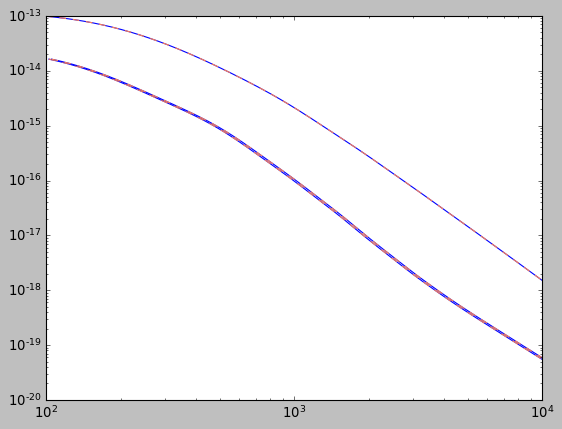

In [72]:
plt.figure()
jj=0
for ii in np.arange(0,len(bi_post),2):
    print(ii,jj)
    plt.loglog(L*(1.+ii/80.),abs(bi_post[ii]+bi_post[ii+1]),color='blue')
    plt.loglog(L*(1.+ii/80.),abs(bi_post_true[jj]),ls='--',color='coral')
    jj+=1
plt.xlim(100,10000)
plt.show()

    